In [1]:
import numpy as np 
import pandas as pd
import os
import re

import matplotlib.pyplot as plt
import seaborn as sns
from transformers import BertTokenizer

In [2]:
DATA_IN_PATH = "data_in/KOR/"

In [3]:
TRAIN_XNLP_DF = os.path.join(DATA_IN_PATH, 'KorNLI', 'multinli.train.ko.tsv')

multinli_data = pd.read_csv(TRAIN_XNLP_DF, sep='\t', error_bad_lines=False)
multinli_data.head(10)


/var/folders/f7/gl6wpvqx5z596rbpjsq5n3tc0000gn/T/ipykernel_88910/2922219533.py:3: FutureWarning: The error_bad_lines argument has been deprecated and will be removed in a future version. Use on_bad_lines in the future.


  multinli_data = pd.read_csv(TRAIN_XNLP_DF, sep='\t', error_bad_lines=False)
Skipping line 24426: expected 3 fields, saw 4
Skipping line 156343: expected 3 fields, saw 4
Skipping line 218766: expected 3 fields, saw 4
Skipping line 232318: expected 3 fields, saw 4
Skipping line 253493: expected 3 fields, saw 4

Skipping line 265734: expected 3 fields, saw 4
Skipping line 282588: expected 3 fields, saw 4
Skipping line 350969: expected 3 fields, saw 4



,sentence1,sentence2,gold_label
0,개념적으로 크림 스키밍은 제품과 지리라는 두 가지 기본 차원을 가지고 있다.,제품과 지리학은 크림 스키밍을 작동시키는 것이다.,neutral
1,시즌 중에 알고 있는 거 알아? 네 레벨에서 다음 레벨로 잃어버리는 거야 브레이브스...,사람들이 기억하면 다음 수준으로 물건을 잃는다.,entailment
2,우리 번호 중 하나가 당신의 지시를 세밀하게 수행할 것이다.,우리 팀의 일원이 당신의 명령을 엄청나게 정확하게 실행할 것이다.,entailment
3,어떻게 아세요? 이 모든 것이 다시 그들의 정보다.,이 정보는 그들의 것이다.,entailment
4,"그래, 만약 네가 테니스화 몇 개를 사러 간다면, 나는 왜 그들이 100달러대에서 ...",테니스화의 가격은 다양하다.,neutral
5,내 워커가 고장나서 지금 화가 났어. 스테레오를 정말 크게 틀어야 해.,나는 내 워크맨이 고장나서 화가 나서 이제 스테레오를 정말 크게 틀어야 한다.,entailment
6,그러나 apse 위에서 살아남은 기독교 모자이크 몇 개는 아기 예수와 함께 성모인데...,기독교 모자이크의 대부분은 이슬람교도들에 의해 파괴되었다.,neutral
7,(슬레이트에 대한 읽기는 잭슨의 연구 결과를 받아들인다.),슬레이트는 잭슨의 발견에 대해 의견을 가지고 있었다.,entailment
8,게이들과 레즈비언들.,이성애자.,contradiction
9,Rue des Francs-Bourgeois의 끝에는 많은 사람들이 돌과 붉은 벽돌...,Place des Vosges는 전적으로 회색 대리석으로 만들어졌다.,contradiction


In [4]:
multinli_data['gold_label'].unique()

array(['neutral', 'entailment', 'contradiction', nan], dtype=object)

In [5]:
print('전체 multinli_data 개수: {}'.format(len(multinli_data)))

전체 multinli_data 개수: 385494


In [8]:
TRAIN_SNLI_DF = os.path.join(DATA_IN_PATH, 'KorNLI', 'snli_1.0_train.kor.tsv')

snli_data = pd.read_csv(TRAIN_SNLI_DF, sep='\t')
snli_data.head(10)

,sentence1,sentence2,gold_label
0,말을 탄 사람이 고장난 비행기 위로 뛰어오른다.,한 사람이 경쟁을 위해 말을 훈련시키고 있다.,neutral
1,말을 탄 사람이 고장난 비행기 위로 뛰어오른다.,한 사람이 식당에서 오믈렛을 주문하고 있다.,contradiction
2,말을 탄 사람이 고장난 비행기 위로 뛰어오른다.,사람은 야외에서 말을 타고 있다.,entailment
3,카메라에 웃고 손을 흔드는 아이들,그들은 부모님을 보고 웃고 있다,neutral
4,카메라에 웃고 손을 흔드는 아이들,아이들이 있다,entailment
5,카메라에 웃고 손을 흔드는 아이들,아이들이 얼굴을 찌푸리고 있다,contradiction
6,한 소년이 빨간 다리 한가운데 스케이트보드에 뛰어오르고 있다.,소년은 인도를 따라 스케이트를 탄다.,contradiction
7,한 소년이 빨간 다리 한가운데 스케이트보드에 뛰어오르고 있다.,그 소년은 스케이트보드를 타는 묘기를 부린다.,entailment
8,한 소년이 빨간 다리 한가운데 스케이트보드에 뛰어오르고 있다.,소년이 안전 장비를 착용하고 있다.,neutral
9,나이 든 남자가 커피숍의 작은 테이블에 오렌지 주스를 들고 앉아 있고 밝은 색 셔츠...,나이 든 남자가 딸이 퇴근하기를 기다리면서 주스를 마신다.,neutral


In [9]:
print(f'전체 snli_data 개수: {len(snli_data)}')

전체 snli_data 개수: 550152


In [11]:
train_data = pd.concat([multinli_data, snli_data], axis =0)
train_data.head(10)

,sentence1,sentence2,gold_label
0,개념적으로 크림 스키밍은 제품과 지리라는 두 가지 기본 차원을 가지고 있다.,제품과 지리학은 크림 스키밍을 작동시키는 것이다.,neutral
1,시즌 중에 알고 있는 거 알아? 네 레벨에서 다음 레벨로 잃어버리는 거야 브레이브스...,사람들이 기억하면 다음 수준으로 물건을 잃는다.,entailment
2,우리 번호 중 하나가 당신의 지시를 세밀하게 수행할 것이다.,우리 팀의 일원이 당신의 명령을 엄청나게 정확하게 실행할 것이다.,entailment
3,어떻게 아세요? 이 모든 것이 다시 그들의 정보다.,이 정보는 그들의 것이다.,entailment
4,"그래, 만약 네가 테니스화 몇 개를 사러 간다면, 나는 왜 그들이 100달러대에서 ...",테니스화의 가격은 다양하다.,neutral
5,내 워커가 고장나서 지금 화가 났어. 스테레오를 정말 크게 틀어야 해.,나는 내 워크맨이 고장나서 화가 나서 이제 스테레오를 정말 크게 틀어야 한다.,entailment
6,그러나 apse 위에서 살아남은 기독교 모자이크 몇 개는 아기 예수와 함께 성모인데...,기독교 모자이크의 대부분은 이슬람교도들에 의해 파괴되었다.,neutral
7,(슬레이트에 대한 읽기는 잭슨의 연구 결과를 받아들인다.),슬레이트는 잭슨의 발견에 대해 의견을 가지고 있었다.,entailment
8,게이들과 레즈비언들.,이성애자.,contradiction
9,Rue des Francs-Bourgeois의 끝에는 많은 사람들이 돌과 붉은 벽돌...,Place des Vosges는 전적으로 회색 대리석으로 만들어졌다.,contradiction


In [12]:
print(f'전체 train_data 개수: {len(train_data)}')

전체 train_data 개수: 935646


In [13]:
train_set = pd.Series(train_data['sentence1'].tolist() + train_data['sentence1'].tolist()).astype(str)
train_set.head()

0           개념적으로 크림 스키밍은 제품과 지리라는 두 가지 기본 차원을 가지고 있다.
1    시즌 중에 알고 있는 거 알아? 네 레벨에서 다음 레벨로 잃어버리는 거야 브레이브스...
2                    우리 번호 중 하나가 당신의 지시를 세밀하게 수행할 것이다.
3                         어떻게 아세요? 이 모든 것이 다시 그들의 정보다.
4    그래, 만약 네가 테니스화 몇 개를 사러 간다면, 나는 왜 그들이 100달러대에서 ...
dtype: object

In [14]:
print(f'전체 train_data 개수: {len(train_set)}')

전체 train_data 개수: 1871292


In [15]:
print(f"유일한 총 문장수 : {len(np.unique(train_set))}")
print(f"반복해서 나타나는 문장의 수: {np.sum(train_set.value_counts() > 1)}")

유일한 총 문장수 : 278038
반복해서 나타나는 문장의 수: 278038


Text(0, 0.5, 'Number of sentence')

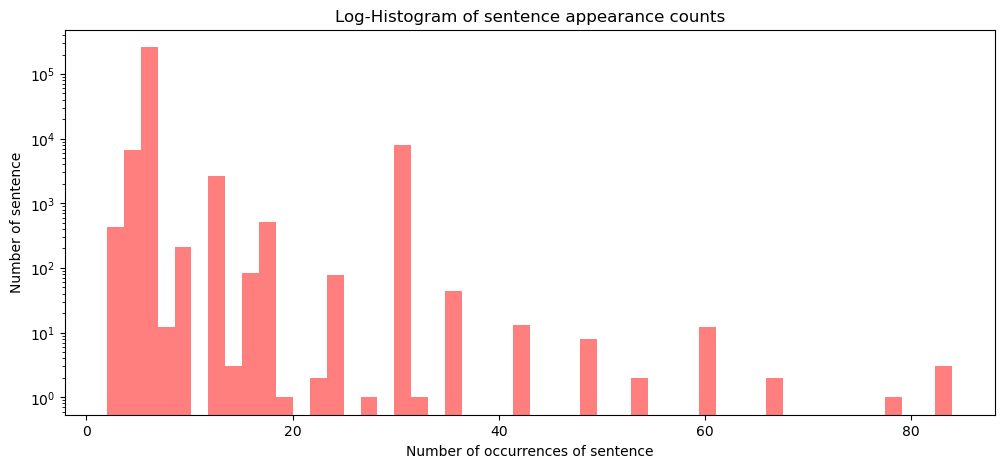

In [19]:
# 그래프에 대한 이미지 사이즈 선언
# figsize: (가로, 세로) 형태의 튜플로 입력
plt.figure(figsize=(12, 5))
# 히스토그램 선언
# bins: 히스토그램 값들에 대한 버켓 범위
# range: x축 값의 범위
# alpha: 그래프 색상 투명도
# color: 그래프 색상
# label: 그래프에 대한 라벨
plt.hist(train_set.value_counts(), bins=50, alpha=0.5, color= 'r', label='word')
plt.yscale('log')
# 그래프 제목
plt.title('Log-Histogram of sentence appearance counts')
# 그래프 x 축 라벨
plt.xlabel('Number of occurrences of sentence')
# 그래프 y 축 라벨
plt.ylabel('Number of sentence')

In [20]:
print('중복 최대 개수: {}'.format(np.max(train_set.value_counts())))
print('중복 최소 개수: {}'.format(np.min(train_set.value_counts())))
print('중복 평균 개수: {:.2f}'.format(np.mean(train_set.value_counts())))
print('중복 표준편차: {:.2f}'.format(np.std(train_set.value_counts())))
print('중복 중간길이: {}'.format(np.median(train_set.value_counts())))
# 사분위의 대한 경우는 0~100 스케일로 되어있음
print('제 1 사분위 중복: {}'.format(np.percentile(train_set.value_counts(), 25)))
print('제 3 사분위 중복: {}'.format(np.percentile(train_set.value_counts(), 75)))

중복 최대 개수: 84
중복 최소 개수: 2
중복 평균 개수: 6.73
중복 표준편차: 4.15
중복 중간길이: 6.0
제 1 사분위 중복: 6.0
제 3 사분위 중복: 6.0


{'whiskers': [<matplotlib.lines.Line2D at 0x347c48590>,
 'caps': [<matplotlib.lines.Line2D at 0x347c31a90>,
 'boxes': [<matplotlib.lines.Line2D at 0x347c1d190>],
 'medians': [<matplotlib.lines.Line2D at 0x347cc6010>],
 'fliers': [<matplotlib.lines.Line2D at 0x347cc6990>],
 'means': [<matplotlib.lines.Line2D at 0x347cc5810>]}

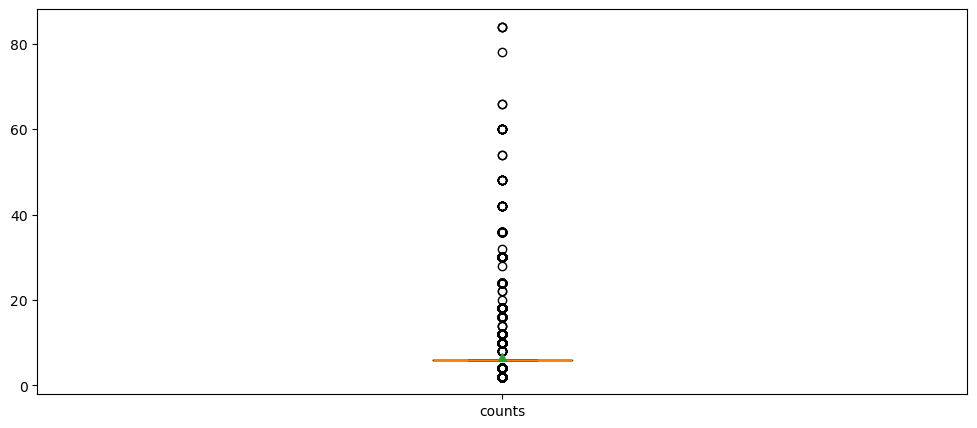

In [21]:
plt.figure(figsize=(12, 5))
# 박스플롯 생성
# 첫번째 파라메터: 여러 분포에 대한 데이터 리스트를 입력
# labels: 입력한 데이터에 대한 라벨
# showmeans: 평균값을 마크함

plt.boxplot([train_set.value_counts()],
             labels=['counts'],
             showmeans=True)

In [23]:
train_length = train_set.apply(len)
train_length

0           42
1          134
2           33
3           28
4           70
          ... 
1871287     17
1871288     17
1871289     37
1871290     37
1871291     37
Length: 1871292, dtype: int64

Text(0, 0.5, 'Probability')

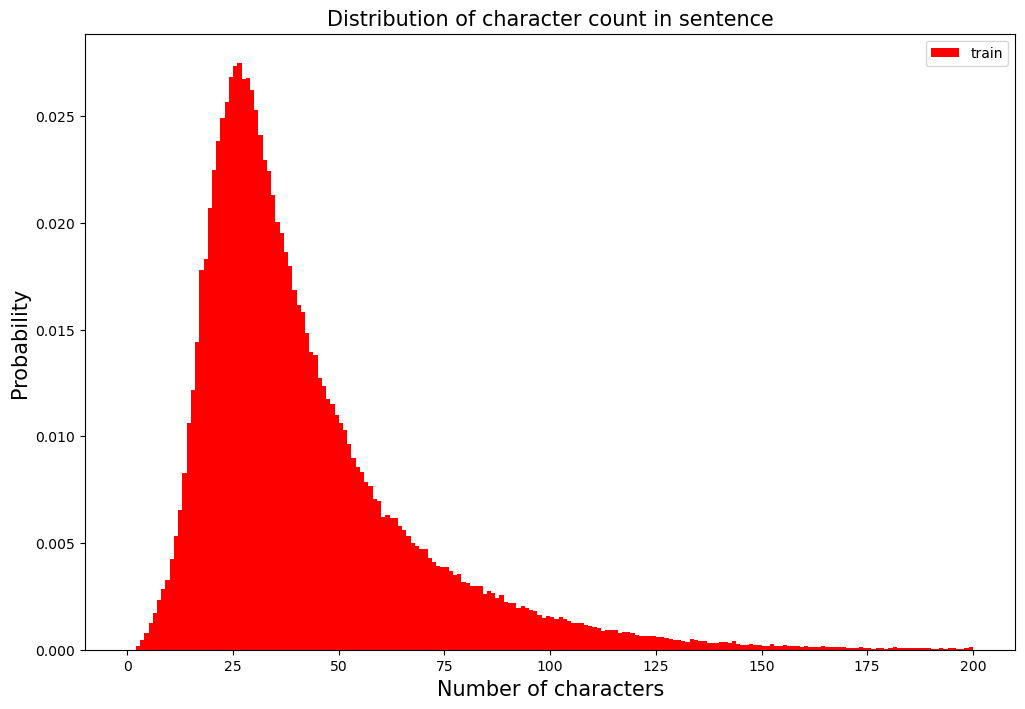

In [31]:
plt.figure(figsize=(12, 8))
plt.hist(train_length, bins=200, range=[0,200], facecolor='r', density=True, label='train')
plt.title("Distribution of character count in sentence", fontsize=15)
plt.legend()
plt.xlabel('Number of characters', fontsize=15)
plt.ylabel('Probability', fontsize=15)

In [25]:
print('문장 길이 최대 값: {}'.format(np.max(train_length)))
print('문장 길이 평균 값: {:.2f}'.format(np.mean(train_length)))
print('문장 길이 표준편차: {:.2f}'.format(np.std(train_length)))
print('문장 길이 중간 값: {}'.format(np.median(train_length)))
print('문장 길이 제 1 사분위: {}'.format(np.percentile(train_length, 25)))
print('문장 길이 제 3 사분위: {}'.format(np.percentile(train_length, 75)))

문장 길이 최대 값: 16542
문장 길이 평균 값: 42.81
문장 길이 표준편차: 65.52
문장 길이 중간 값: 34.0
문장 길이 제 1 사분위: 24.0
문장 길이 제 3 사분위: 51.0


{'whiskers': [<matplotlib.lines.Line2D at 0x348d66490>,
 'caps': [<matplotlib.lines.Line2D at 0x348d67910>,
 'boxes': [<matplotlib.lines.Line2D at 0x348d30550>],
 'medians': [<matplotlib.lines.Line2D at 0x348d787d0>],
 'fliers': [<matplotlib.lines.Line2D at 0x348d79710>],
 'means': [<matplotlib.lines.Line2D at 0x348d79090>]}

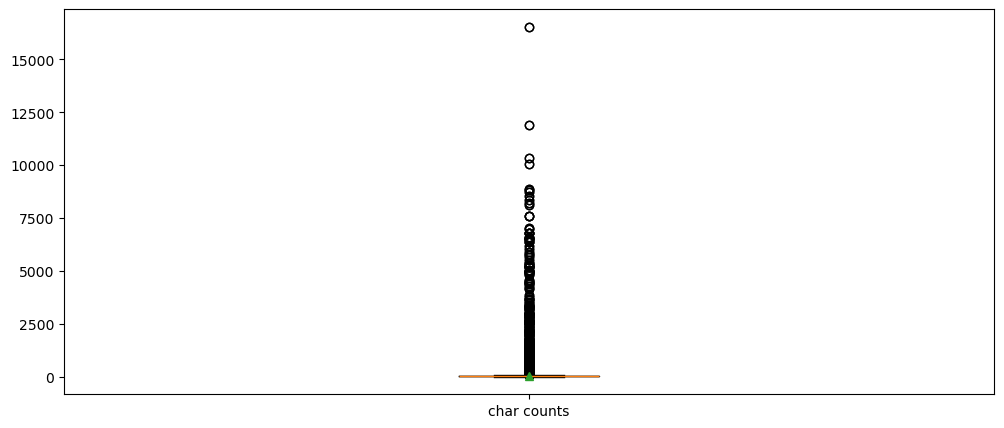

In [26]:
plt.figure(figsize=(12, 5))

plt.boxplot(train_length,
             labels=['char counts'],
             showmeans=True)

In [28]:
train_word_counts = train_set.apply(lambda x:len(x.split(' ')) )
train_word_counts

0          11
1          34
2           9
3           8
4          20
           ..
1871287     5
1871288     5
1871289    10
1871290    10
1871291    10
Length: 1871292, dtype: int64

Text(0, 0.5, 'Probability')

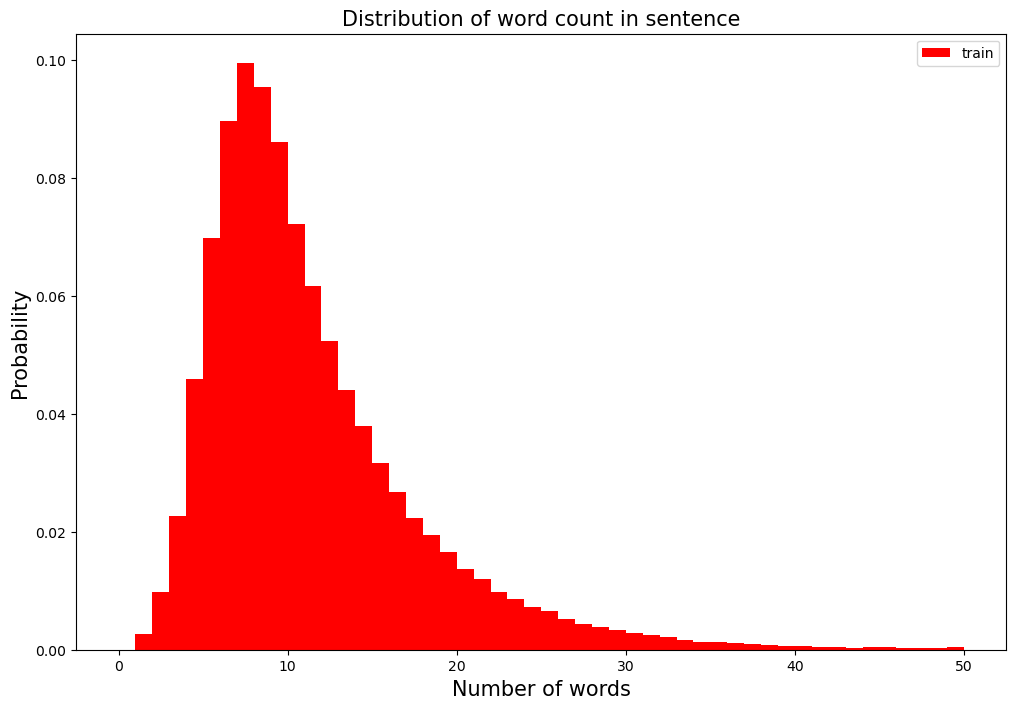

In [30]:
plt.figure(figsize=(12, 8))
plt.hist(train_word_counts, bins=50, range=[0, 50], facecolor='r', density=True, label='train')
plt.title('Distribution of word count in sentence', fontsize=15)
plt.legend()
plt.xlabel('Number of words', fontsize=15)
plt.ylabel('Probability', fontsize=15)

In [32]:
print('문장 단어 개수 최대 값: {}'.format(np.max(train_word_counts)))
print('문장 단어 개수 평균 값: {:.2f}'.format(np.mean(train_word_counts)))
print('문장 단어 개수 표준편차: {:.2f}'.format(np.std(train_word_counts)))
print('문장 단어 개수 중간 값: {}'.format(np.median(train_word_counts)))
print('문장 단어 개수 제 1 사분위: {}'.format(np.percentile(train_word_counts, 25)))
print('문장 단어 개수 제 3 사분위: {}'.format(np.percentile(train_word_counts, 75)))
print('문장 단어 개수 99 퍼센트: {}'.format(np.percentile(train_word_counts, 99)))

문장 단어 개수 최대 값: 3295
문장 단어 개수 평균 값: 11.15
문장 단어 개수 표준편차: 13.53
문장 단어 개수 중간 값: 9.0
문장 단어 개수 제 1 사분위: 7.0
문장 단어 개수 제 3 사분위: 14.0
문장 단어 개수 99 퍼센트: 36.0


{'whiskers': [<matplotlib.lines.Line2D at 0x349168110>,
 'caps': [<matplotlib.lines.Line2D at 0x3491693d0>,
 'boxes': [<matplotlib.lines.Line2D at 0x349132a50>],
 'medians': [<matplotlib.lines.Line2D at 0x34916a2d0>],
 'fliers': [<matplotlib.lines.Line2D at 0x34916b190>],
 'means': [<matplotlib.lines.Line2D at 0x34916aad0>]}

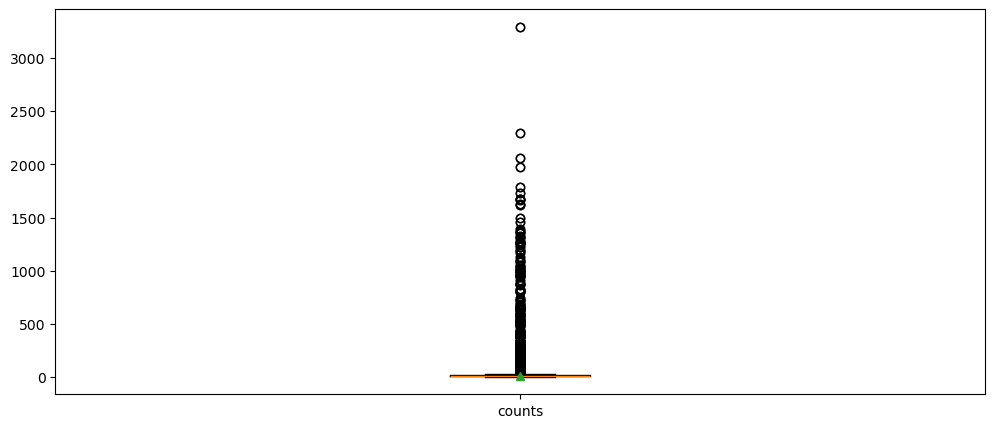

In [33]:
plt.figure(figsize=(12, 5))

plt.boxplot(train_word_counts,
             labels=['counts'],
             showmeans=True)

In [35]:
qmarks = np.mean(train_set.apply(lambda x: '?' in x)) # 물음표가 구두점으로 쓰임
math = np.mean(train_set.apply(lambda x: '[math]' in x)) # []
fullstop = np.mean(train_set.apply(lambda x: '.' in x)) # 마침표
capital_first = np.mean(train_set.apply(lambda x: x[0].isupper())) #  첫번째 대문자
capitals = np.mean(train_set.apply(lambda x: max([y.isupper() for y in x]))) # 대문자가 몇개
numbers = np.mean(train_set.apply(lambda x: max([y.isdigit() for y in x]))) # 숫자가 몇개
                  
print('물음표가있는 문장: {:.2f}%'.format(qmarks * 100))
print('수학 태그가있는 문장: {:.2f}%'.format(math * 100))
print('마침표를 포함한 문장: {:.2f}%'.format(fullstop * 100))
print('첫 글자가 대문자 인 문장: {:.2f}%'.format(capital_first * 100))
print('대문자가있는 문장: {:.2f}%'.format(capitals * 100))
print('숫자가있는 문장: {:.2f}%'.format(numbers * 100))

물음표가있는 문장: 2.22%
수학 태그가있는 문장: 0.00%
마침표를 포함한 문장: 92.52%
첫 글자가 대문자 인 문장: 1.41%
대문자가있는 문장: 5.26%
숫자가있는 문장: 9.10%


In [38]:
tokenizer = BertTokenizer.from_pretrained('bert-base-multilingual-cased', cache_dir = 'bert_ckpt', do_lower_case = False, clean_up_tokenization_spaces=True)

In [39]:
tokenizer

BertTokenizer(name_or_path='bert-base-multilingual-cased', vocab_size=119547, model_max_length=512, is_fast=False, padding_side='right', truncation_side='right', special_tokens={'unk_token': '[UNK]', 'sep_token': '[SEP]', 'pad_token': '[PAD]', 'cls_token': '[CLS]', 'mask_token': '[MASK]'}, clean_up_tokenization_spaces=True),  added_tokens_decoder={
	0: AddedToken("[PAD]", rstrip=False, lstrip=False, single_word=False, normalized=False, special=True),
	100: AddedToken("[UNK]", rstrip=False, lstrip=False, single_word=False, normalized=False, special=True),
	101: AddedToken("[CLS]", rstrip=False, lstrip=False, single_word=False, normalized=False, special=True),
	102: AddedToken("[SEP]", rstrip=False, lstrip=False, single_word=False, normalized=False, special=True),
	103: AddedToken("[MASK]", rstrip=False, lstrip=False, single_word=False, normalized=False, special=True),
}

# Tokenizer Cased

In [40]:
train_bert_token_counts = train_set.apply(lambda x: len(tokenizer.tokenize(x)))

Text(0, 0.5, 'Probability')

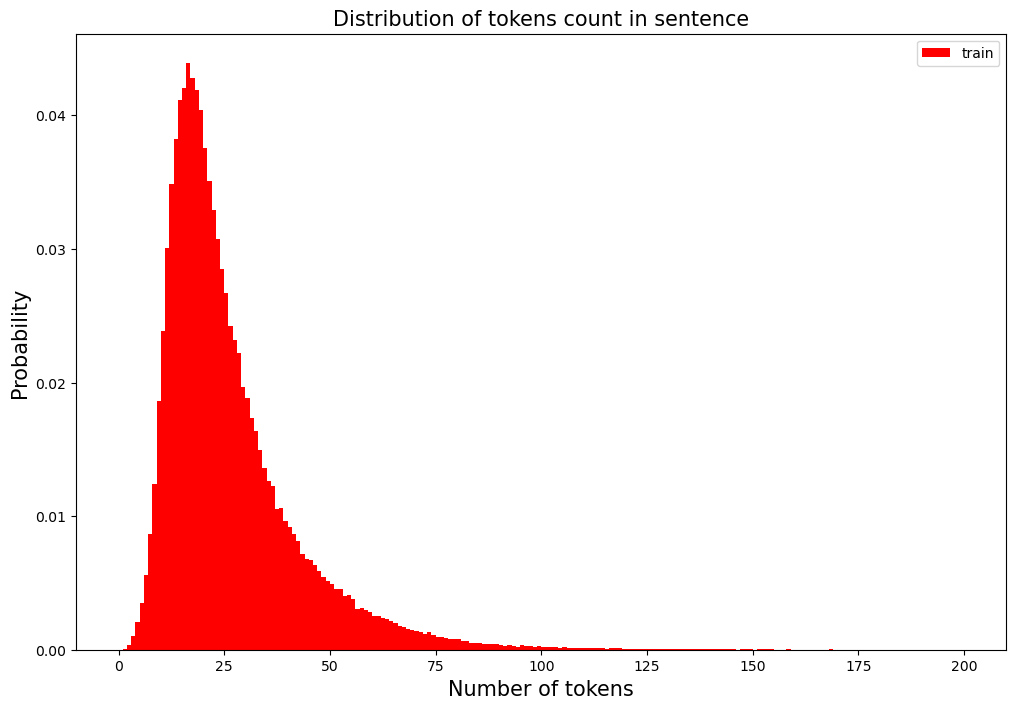

In [41]:
plt.figure(figsize=(12, 8))
plt.hist(train_bert_token_counts, bins=200, range=[0, 200], facecolor='r', density=True, label='train')
plt.title('Distribution of tokens count in sentence', fontsize=15)
plt.legend()
plt.xlabel('Number of tokens', fontsize=15)
plt.ylabel('Probability', fontsize=15)

In [42]:
print('문장 tokens 개수 최대 값: {}'.format(np.max(train_bert_token_counts)))
print('문장 tokens 개수 평균 값: {:.2f}'.format(np.mean(train_bert_token_counts)))
print('문장 tokens 개수 표준편차: {:.2f}'.format(np.std(train_bert_token_counts)))
print('문장 tokens 개수 중간 값: {}'.format(np.median(train_bert_token_counts)))
print('문장 tokens 개수 제 1 사분위: {}'.format(np.percentile(train_bert_token_counts, 25)))
print('문장 tokens 개수 제 3 사분위: {}'.format(np.percentile(train_bert_token_counts, 75)))
print('문장 tokens 개수 99 퍼센트: {}'.format(np.percentile(train_bert_token_counts, 99)))

문장 tokens 개수 최대 값: 9006
문장 tokens 개수 평균 값: 26.26
문장 tokens 개수 표준편차: 36.32
문장 tokens 개수 중간 값: 21.0
문장 tokens 개수 제 1 사분위: 15.0
문장 tokens 개수 제 3 사분위: 32.0
문장 tokens 개수 99 퍼센트: 84.0


In [46]:
train_bert_token_counts.describe()

count    1.871292e+06
mean     2.625640e+01
std      3.631966e+01
min      1.000000e+00
25%      1.500000e+01
50%      2.100000e+01
75%      3.200000e+01
max      9.006000e+03
dtype: float64

{'whiskers': [<matplotlib.lines.Line2D at 0x34b312750>,
 'caps': [<matplotlib.lines.Line2D at 0x34b31f5d0>,
 'boxes': [<matplotlib.lines.Line2D at 0x34aa01910>],
 'medians': [<matplotlib.lines.Line2D at 0x34b32b590>],
 'fliers': [<matplotlib.lines.Line2D at 0x34b32cb50>],
 'means': [<matplotlib.lines.Line2D at 0x34b32c210>]}

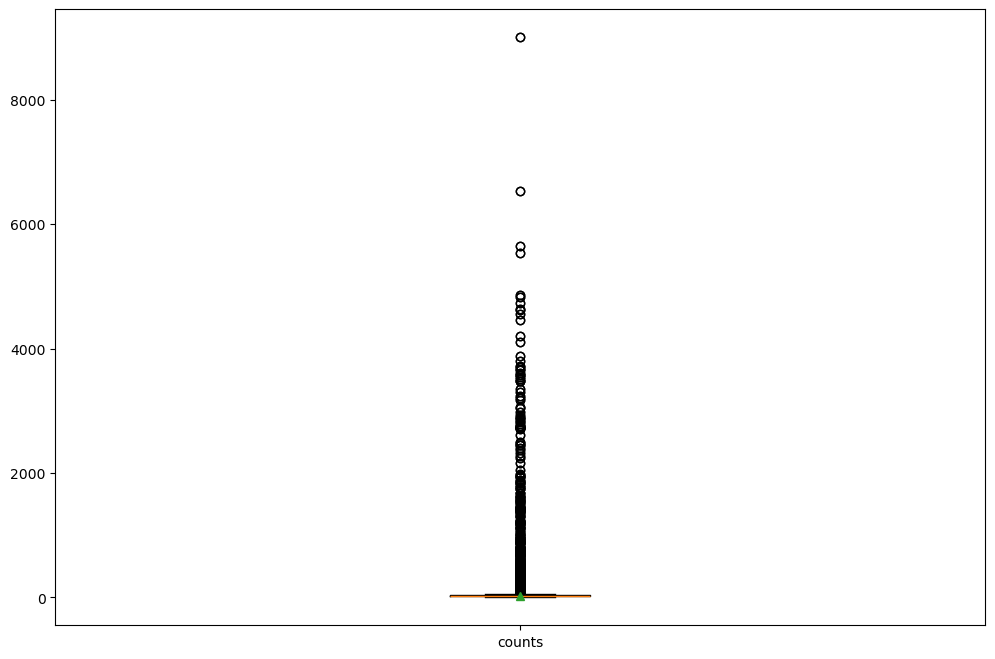

In [49]:
plt.figure(figsize = (12,8))

plt.boxplot(train_bert_token_counts,
           labels=['counts'],
           showmeans =True)

(-0.5, 799.5, 599.5, -0.5)

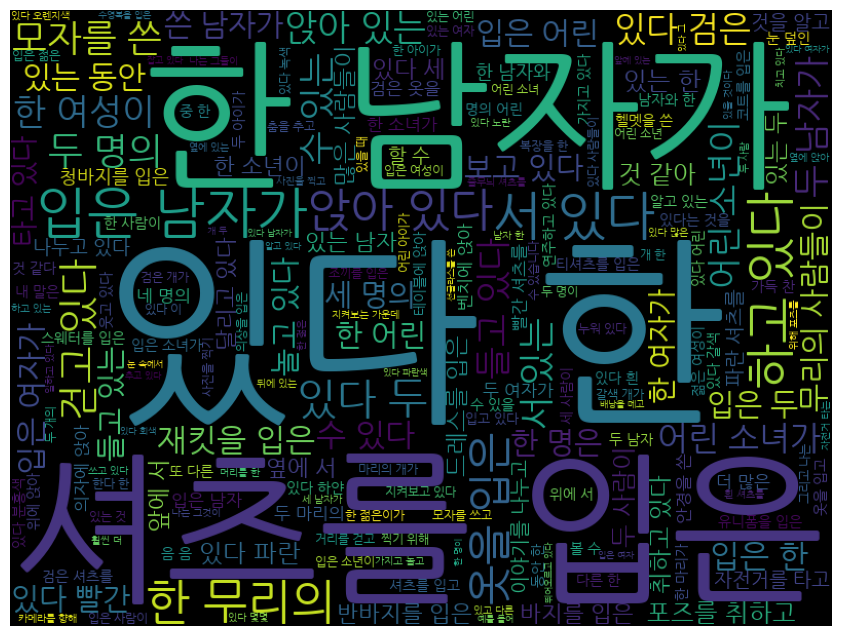

In [50]:
from wordcloud import WordCloud

font_path = os.path.join(DATA_IN_PATH, 'NanumGothic.ttf')
cloud = WordCloud(font_path = font_path, width=800, height=600).generate(" ".join(train_set.astype(str)))
plt.figure(figsize=(12,8))
plt.imshow(cloud)
plt.axis('off')

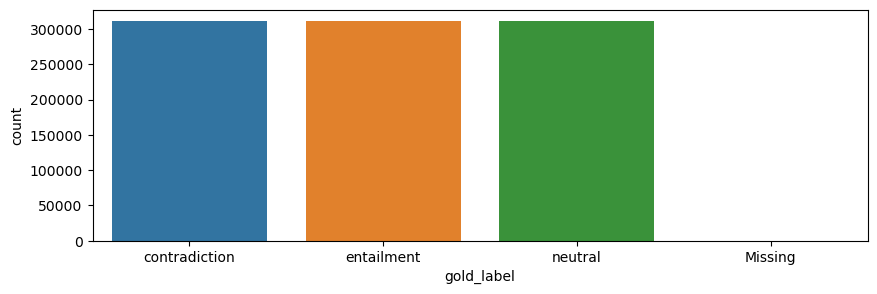

In [57]:
# 데이터 열을 범주형으로 변환
train_data['gold_label'] = train_data['gold_label'].astype('category')

# 그래프 그리기
fig, axe = plt.subplots(ncols=1)
fig.set_size_inches(10, 3)
sns.countplot(x='gold_label', data=train_data)
plt.show()